### Final Project on Environmental Sustainability
### Introduction
Both of my datasets are from the World Bank's World Development Explorer (https://www.worlddev.xyz). There are 21 categories with over 1400 indicators in total. The indicators are for all countries and regions in the world. I will be utilizing datasets from the economic growth, environment, and health categories. Economic growth includes GDP data; health includes population data and life expectancy at birth; environmental data includes percentage of electricity production from fossil fuels and renewable sources, as well as CO2 emissions for each country. All data are for the year 2015. Research has documented the ill effects of carbon emissions on human health caused by ever-expanding industrialization/production to boost GDP. I will be exploring several relationships between the data. 

QUESTION 1: Does GDP per capita make CO2 emissions increase? 

QUESTION 2: Does GDP per capita increase life expectancy?

QUESTION 3: How does % fossil fuels affect CO2 emissions (positive or negative)?

QUESTION 4: Which country produces its max amount of electricity from renewable sources?

Dataset 1: 803 rows, 3 columns

Dataset 2: 281 rows, 3 columns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading two datasets and using only columns I need for analysis
rawdata1=pd.read_csv('/Users/aminrimdans/Documents/GitHub/MyData601/Final/wdi_data-1.csv',
                  usecols=['Country Name','indicator','value'])
rawdata2=pd.read_csv('/Users/aminrimdans/Documents/GitHub/MyData601/Final/wdi_data-2.csv',
                  usecols=['Country Name','indicator','value'])

#creating a copy of each dataset to work on so I don't make changes to the original
data1=rawdata1.copy()
data2=rawdata2.copy()

In [3]:
#sample of first dataset looks good
data1

,value,indicator,Country Name
0,2087.305323,NY.GDP.PCAP.PP.CD,Afghanistan
1,11658.866060,NY.GDP.PCAP.PP.CD,Albania
2,12015.632907,NY.GDP.PCAP.PP.CD,Algeria
3,7337.569822,NY.GDP.PCAP.PP.CD,Angola
4,18911.306894,NY.GDP.PCAP.PP.CD,Antigua and Barbuda
...,...,...,...
798,173880.000000,EN.ATM.CO2E.KT,"Venezuela, RB"
799,209200.000000,EN.ATM.CO2E.KT,Vietnam
800,14210.000000,EN.ATM.CO2E.KT,"Yemen, Rep."
801,5070.000000,EN.ATM.CO2E.KT,Zambia


In [4]:
#sample of second dataset looks good
data2

,value,indicator,Country Name
0,0.000000,EG.ELC.RNWX.ZS,Albania
1,0.111922,EG.ELC.RNWX.ZS,Algeria
2,0.000000,EG.ELC.RNWX.ZS,Angola
3,1.898494,EG.ELC.RNWX.ZS,Argentina
4,0.051289,EG.ELC.RNWX.ZS,Armenia
...,...,...,...
277,36.304958,EG.ELC.FOSL.ZS,"Venezuela, RB"
278,63.267942,EG.ELC.FOSL.ZS,Vietnam
279,100.000000,EG.ELC.FOSL.ZS,"Yemen, Rep."
280,3.006176,EG.ELC.FOSL.ZS,Zambia


In [5]:
#ensuring value column which will be used for analysis is in numeric data type
data1.dtypes,data2.dtypes

(value           float64
 indicator        object
 Country Name     object
 dtype: object,
 value           float64
 indicator        object
 Country Name     object
 dtype: object)

### NOTE
Both datasets combined should be 6 unique columns based on my chosen indicators but the raw data
isn't structured in this manner. It uses three common columns and concatenates country data by rows, hence, 803 rows in dataset1 and 282 in dataset2. There aren't that many countries in the world. Below, I will be slicing out each of my 6 desired columns into separate dataframes that I can later join.

In [6]:
#confirming 4 unique indicators are contained in data1
data1['indicator'].unique()

array(['NY.GDP.PCAP.PP.CD', 'SP.POP.TOTL', 'SP.DYN.LE00.IN',
       'EN.ATM.CO2E.KT'], dtype=object)

In [7]:
#confirming 2 unique indicators are contained in data2
data2['indicator'].unique()

array(['EG.ELC.RNWX.ZS', 'EG.ELC.FOSL.ZS'], dtype=object)

In [8]:
#mathematical confirmation of total unique indicators which I will be slicing out and transforming into columns
len(data1['indicator'].unique())+len(data2['indicator'].unique())

6

In [9]:
#slicing out each unique indicator from the concatenated raw datasets
GDP_per_capita = data1[data1['indicator']=='NY.GDP.PCAP.PP.CD']
population = data1[data1['indicator']=='SP.POP.TOTL']
co2 = data1[data1['indicator']=='EN.ATM.CO2E.KT']
life_expectancy = data1[data1['indicator']=='SP.DYN.LE00.IN']
fossils = data2[data2['indicator']=='EG.ELC.FOSL.ZS']
renewables = data2[data2['indicator']=='EG.ELC.RNWX.ZS']

In [10]:
#sample check to ensure proper slicing
population.head()

,value,indicator,Country Name
195,34413603.0,SP.POP.TOTL,Afghanistan
196,2880703.0,SP.POP.TOTL,Albania
197,39728020.0,SP.POP.TOTL,Algeria
198,55806.0,SP.POP.TOTL,American Samoa
199,77993.0,SP.POP.TOTL,Andorra


### NOTE
The "indicator" column is still present but after slicing, it is irrelevant to any analysis. For better clarity, I will rename each dataframe's "value" column to reflect a more specific name then drop the repetitive indicator column. See cell below.

In [11]:
#renaming all columns for ease of understanding and dropping the "indicator" column from each dataframe
#warning about changing value of slice of a copy is noted. I created a copy in the beginning to avoid changing orig.


GDP_per_capita.rename(columns={'Country Name':'country','value':'GDP/capita ($)'},inplace=True)
GDP_per_capita=GDP_per_capita.drop(columns='indicator')
population.rename(columns={'Country Name':'country','value':'population'},inplace=True)
population=population.drop(columns='indicator')
co2.rename(columns={'Country Name':'country','value':'CO2_emission (kt)'},inplace=True)
co2=co2.drop(columns='indicator')
life_expectancy.rename(columns={'Country Name':'country','value':'life_expec (yrs)'},inplace=True)
life_expectancy=life_expectancy.drop(columns='indicator')
fossils.rename(columns={'Country Name':'country','value':'% fossil fuels'},inplace=True)
fossils=fossils.drop(columns='indicator')
renewables.rename(columns={'Country Name':'country','value':'% renewables'},inplace=True)
renewables=renewables.drop(columns='indicator')

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
#list of all 6 indicator dataframes that will be joined into one
dfs=[GDP_per_capita,population,fossils,renewables,life_expectancy,co2]

In [13]:
#function to merge my data frames by country into a single new dataframe for analysis
def merger():
    df=pd.DataFrame(data=GDP_per_capita['country'])
    for i in dfs:
        df=pd.merge(df, i, left_on='country', right_on='country', how='inner')
    return df
df = merger()
df
#merge is successful and has all columns; only 132 countries with complete data are shown
#original population data exists for 216 countries (max rows) and fossils & renewables for 141 countries (min rows)
#across all 6 indicators for each country, only the 132 shown below have complete data

,country,GDP/capita ($),population,% fossil fuels,% renewables,life_expec (yrs),CO2_emission (kt)
0,Albania,11658.866060,2880703.0,0.000000,0.000000,78.025,5070.0
1,Algeria,12015.632907,39728020.0,99.677316,0.111922,76.090,145970.0
2,Angola,7337.569822,27884380.0,46.825072,0.000000,59.398,35160.0
3,Argentina,20105.198992,43131966.0,66.935022,1.898494,76.068,186090.0
4,Armenia,9969.664854,2925559.0,35.914861,0.051289,74.467,5340.0
...,...,...,...,...,...,...,...
127,Uruguay,20217.560437,3412013.0,11.441048,28.398836,77.369,6590.0
128,Uzbekistan,6343.149742,31298900.0,79.347067,0.000000,70.928,101530.0
129,Vietnam,6102.636869,92677082.0,63.267942,0.118082,75.110,209200.0
130,Zambia,3430.400287,15879370.0,3.006176,0.000000,61.737,5070.0


In [14]:
df.info()
#all values are not null and all indicator columns for analysis are in float type expect country names.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            132 non-null    object 
 1   GDP/capita ($)     132 non-null    float64
 2   population         132 non-null    float64
 3   % fossil fuels     132 non-null    float64
 4   % renewables       132 non-null    float64
 5   life_expec (yrs)   132 non-null    float64
 6   CO2_emission (kt)  132 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.2+ KB


In [15]:
df.describe()
#sanity check looks good; percentage values are within 0-100 range and life_expec (age) values are reasonable

,GDP/capita ($),population,% fossil fuels,% renewables,life_expec (yrs),CO2_emission (kt)
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,1.320000e+02
mean,22190.667744,5.241567e+07,57.963711,7.511903,73.461939,2.435665e+05
std,20176.123853,1.684887e+08,32.526274,11.156854,7.099341,9.818253e+05
min,905.450599,3.308150e+05,0.000000,0.000000,53.112000,1.650000e+03
25%,7173.545247,4.811343e+06,34.298535,0.089294,70.242000,8.440000e+03
50%,14836.261080,1.070560e+07,61.453210,2.016305,74.953098,3.289500e+04
75%,31674.970316,3.910922e+07,89.814201,9.847934,78.606098,1.217450e+05
max,103722.990846,1.371220e+09,100.000000,65.443742,83.793902,9.830430e+06


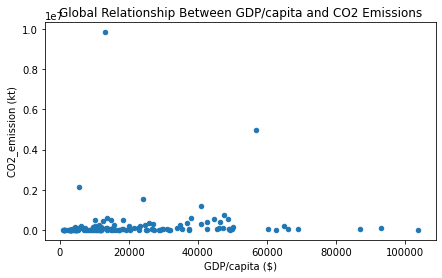

'Based on the scatterplot, GDP per capita does not increase CO2 emissions. Countries with the highest GDP\ndo not have higher CO2 emissions'

In [16]:
#QUESTION 1: Does GDP per capita make CO2 emissions increase?


df.plot(kind='scatter',x='GDP/capita ($)',y='CO2_emission (kt)',figsize=(7,4),
       title='Global Relationship Between GDP/capita and CO2 Emissions')
plt.show()

'''Based on the scatterplot, GDP per capita does not increase CO2 emissions. Countries with the highest GDP
do not have higher CO2 emissions'''

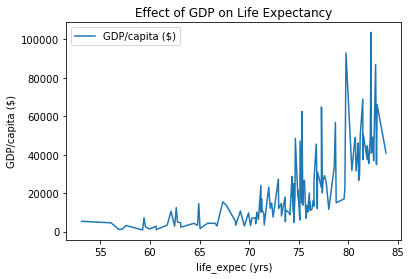

'It is obvious here that life expectancy is highest in countries with high GDP per capita values.\nLower GDP countries follow the same pattern as they reflect lower life expectancy'

In [17]:
#QUESTION 2: How about life expectancy?


df.groupby('life_expec (yrs)').agg({'GDP/capita ($)':'mean'}).plot()
plt.ylabel('GDP/capita ($)')
plt.xlabel('life_expec (yrs)')
plt.title('Effect of GDP on Life Expectancy')
plt.show()

'''It is obvious here that life expectancy is highest in countries with high GDP per capita values.
Lower GDP countries follow the same pattern as they reflect lower life expectancy'''

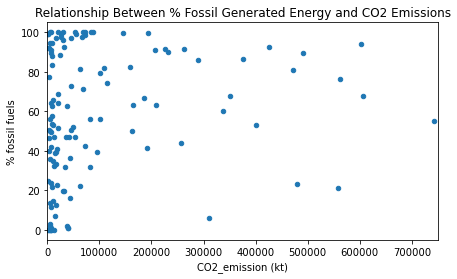

'The relationship between % fossil fuels and CO2 emissions is unclear. The expected trend was that higher fossils\nwould result in higher CO2 emissions. However, because CO2 emission is not representative of the size of each\ncountry, larger countries might produce more CO2 without using up to 100% of fossil fuels in their electricity\ngeneration. This is an area for more research.'

In [53]:
#QUESTION 3: How does % fossil fuels affect CO2 emissions (positive or negative)?

df.plot(kind='scatter',y='% fossil fuels',x='CO2_emission (kt)',figsize=(7,4),
       title='Relationship Between % Fossil Generated Energy and CO2 Emissions')
plt.xlim(left=0,right=750000)
plt.xlim
plt.show()

'''The relationship between % fossil fuels and CO2 emissions is unclear. The expected trend was that higher fossils
would result in higher CO2 emissions. However, because CO2 emission is not representative of the size of each
country, larger countries might produce more CO2 without using up to 100% of fossil fuels in their electricity
generation. This is an area for more research.'''

In [51]:
#QUESTION 4: Which country produces its max amount of electricity from renewable sources?
max_ren = df['% renewables'].max()
df.sort_values('% renewables')

,country,GDP/capita ($),population,% fossil fuels,% renewables,life_expec (yrs),CO2_emission (kt)
0,Albania,11658.866060,2880703.0,0.000000,0.000000,78.025000,5070.0
47,Haiti,2903.359903,10695540.0,92.003854,0.000000,62.485000,3320.0
54,Iraq,9763.904090,35572269.0,50.149444,0.000000,69.929000,162190.0
64,Kuwait,47230.660133,3835588.0,100.000000,0.000000,75.130000,88040.0
130,Zambia,3430.400287,15879370.0,3.006176,0.000000,61.737000,5070.0
...,...,...,...,...,...,...,...
69,Lithuania,28834.427680,2904910.0,52.935651,31.211837,74.321951,11070.0
36,El Salvador,7597.689174,6325121.0,42.177325,35.231257,72.412000,7000.0
85,Nicaragua,5293.870462,6223234.0,49.945403,43.612142,73.649000,5270.0
62,Kenya,3361.977137,47878339.0,12.485753,48.274790,64.798000,17090.0


Denmark has the maximum percentage of electricity generated from renewable energy = 65.4%

### Conclusion and Lessons Learned
According to the dataset:

- GDP per capita does not increase CO2 emissions

- GDP per capita highly impacts life expectancy

- Denmark produces it's electricity with the highest amount of renewable energy

- Data cleaning really does take the most work

- Not having a definite answer is also a part of the research process